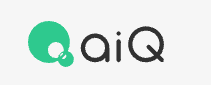

[disclaimer](./disclaimer.txt/)

# How to retrieve FACTSET Equity market time series using ASR

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  


In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL()
data_source = 'FACTSET'

### **load**
> Load the data to memory

loading AAPL-US (Apple), 7203-JP (Toyota), MSFT-US (Microsoft) market time series information

In [2]:
# `data_type` must be 'gpd_prices'
handler = handler.load(
    data_source,
    data_type='gpd_prices',
    ids=['AAPL-US', '7203-JP', 'MSFT-US'],
    start_date='2023-01-01',
    adjust='SPLIT',
    fields=['price', 'vwap', 'volume', 'turnover']
)

### **retrieve**
> Retrieve to `Pandas.DataFrame` the loaded data via `retrieve`

Symbol data to Dataframe

In [3]:
df_mkt = handler.retrieve()
df_mkt.head()

volume   ticker   close        vwap currency  \
SYMBOL   DATETIME                                                        
MH33D6-R 2022-12-30   77034209.0  AAPL-US  129.93  128.821023      USD   
         2023-01-03  112117471.0  AAPL-US  125.07  125.693370      USD   
         2023-01-04   89113633.0  AAPL-US  126.36  126.641738      USD   
         2023-01-05   80962708.0  AAPL-US  125.02  126.078091      USD   
         2023-01-06   87754715.0  AAPL-US  129.62  128.229937      USD   

                         turnover  
SYMBOL   DATETIME                  
MH33D6-R 2022-12-30  9.877545e+06  
         2023-01-03  1.403410e+07  
         2023-01-04  1.119978e+07  
         2023-01-05  1.008031e+07  
         2023-01-06  1.112700e+07

### Get Unique tickers

In [4]:
df_mkt['ticker'].unique()

array(['AAPL-US', '7203-JP', 'MSFT-US'], dtype=object)

### **split_adjust**
> for unadjusted split information

load and retrieving non split adjusted data

In [5]:
handler.load(
    data_source,
    data_type='gpd_prices',
    ids=['MS-US', '9983-JP'],
    start_date='2023-01-01',
    adjust='UNSPLIT',
    fields=['price', 'vwap', 'volume', 'turnover']
)
df_unadj = handler.retrieve()
df_unadj.head()

volume ticker  close       vwap currency  \
SYMBOL   DATETIME                                                  
CY644B-R 2022-12-30  4455649.0  MS-US  85.02  84.823234      USD   
         2023-01-03  5108896.0  MS-US  85.72  85.612901      USD   
         2023-01-04  7726771.0  MS-US  86.65  86.415300      USD   
         2023-01-05  5339886.0  MS-US  85.92  85.639517      USD   
         2023-01-06  5710882.0  MS-US  87.56  87.319164      USD   

                          turnover  
SYMBOL   DATETIME                   
CY644B-R 2022-12-30  377063.181800  
         2023-01-03  437121.332701  
         2023-01-04  641215.926946  
         2023-01-05  457229.074332  
         2023-01-06  498109.890019

#### Get Unique tickers

In [6]:
df_unadj['ticker'].unique()

array(['MS-US', '9983-JP'], dtype=object)

### **pick_cols**
> You can choose which columns to keep in the output by specifying `pick_cols`

example is choosing 'close' and 'vwap'  

In [7]:
df_small = handler.retrieve(
    pick_cols=['close', 'vwap']
)
df_small.head()

close       vwap
SYMBOL   DATETIME                    
CY644B-R 2022-12-30  85.02  84.823234
         2023-01-03  85.72  85.612901
         2023-01-04  86.65  86.415300
         2023-01-05  85.92  85.639517
         2023-01-06  87.56  87.319164

***

## *Next Up*
Part2: [load quants data](./notebook.ipynb)